# LBF10x10-n2-f7-static-v2 Heuristic policies analysis 

In [7]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents

import baposgmcp.plot as plot_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, "experiments", "lbf", "LBF10x10-n2-f7-static-v2", "results", "heuristic_results_v1.csv"
)
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "lbf10x10_n2_f7_static_v2", "results", "heuristic_pairwise_results.csv"
)

## Loading Heuristic Policy Data

In [8]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)

coplayer_policy_ids = policy_df["policy_id"].unique().tolist()
coplayer_policy_ids.sort()
print("Policies")
print("--------")
for pi_id in coplayer_policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in policy_df.columns:
    print("  ", c)

Policies
--------
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0

Columns
-------
   Unnamed: 0
   exp_id
   agent_id
   env_name
   policy_id
   exp_seed
   num_episodes
   time_limit
   episode_return_mean
   episode_return_std
   episode_return_max
   episode_return_min
   episode_steps_mean
   episode_steps_std
   episode_time_mean
   episode_time_std
   num_episode_done
   num_LOSS
   num_DRAW
   num_WIN
   num_NA
   episode_return_CI
   episode_steps_CI
   episode_time_CI
   prop_LOSS
   prop_DRAW
   prop_WIN
   prop_NA
   coplayer_policy_id


## Loading BAPOSGMCP Data

In [9]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_1024
   POMetaRollout_pucb_128
   POMetaRollout_pucb_2048
   POMetaRollout_pucb_32
   POMetaRollout_pucb_512
   POMetaRollout_pucb_8
   POMetaRollout_ucb_1024
   POMetaRollout_ucb_128
   POMetaRollout_ucb_2048
   POMetaRollout_ucb_32
   POMetaRollout_ucb_512
   POMetaRollout_ucb_8
   POMetaRollout_uniform_1024
   POMetaRollout_uniform_128
   POMetaRollout_uniform_2048
   POMetaRollout_uniform_32
   POMetaRollout_uniform_512
   POMetaRollout_uniform_8
   POMeta_1024
   POMeta_128
   POMeta_2048
   POMeta_32
   POMeta_512
   POMeta_8
   baposgmcp_1024
   baposgmcp_128
   baposgmcp_2048
   baposgmcp_32
   baposgmcp_512
   baposgmcp_8
   baposgmcp_ucb_1024
   baposgmcp_ucb_128
   baposgmcp_ucb_2048
   baposgmcp_ucb_32
   baposgmcp_ucb_512
   baposgmcp_ucb_8
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0
   metabaseline

Columns
-------
   Unnamed: 0.1
   Unnamed: 0
   exp_id
   agent_id
   env_id
   exp_seed
   num_episodes
   ti

## Combine data

In [10]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([baposgmcp_df, policy_df]).reset_index(drop = True)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_1024
   POMetaRollout_pucb_128
   POMetaRollout_pucb_2048
   POMetaRollout_pucb_32
   POMetaRollout_pucb_512
   POMetaRollout_pucb_8
   POMetaRollout_ucb_1024
   POMetaRollout_ucb_128
   POMetaRollout_ucb_2048
   POMetaRollout_ucb_32
   POMetaRollout_ucb_512
   POMetaRollout_ucb_8
   POMetaRollout_uniform_1024
   POMetaRollout_uniform_128
   POMetaRollout_uniform_2048
   POMetaRollout_uniform_32
   POMetaRollout_uniform_512
   POMetaRollout_uniform_8
   POMeta_1024
   POMeta_128
   POMeta_2048
   POMeta_32
   POMeta_512
   POMeta_8
   baposgmcp_1024
   baposgmcp_128
   baposgmcp_2048
   baposgmcp_32
   baposgmcp_512
   baposgmcp_8
   baposgmcp_ucb_1024
   baposgmcp_ucb_128
   baposgmcp_ucb_2048
   baposgmcp_ucb_32
   baposgmcp_ucb_512
   baposgmcp_ucb_8
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0
   metabaseline

Columns
-------
   Unnamed: 0.1
   Unnamed: 0
   exp_id
   agent_id
   env_id
   exp_seed
   num_episodes
   ti

## Pairwise performance by number of simulations

Here we look at the performance of each policy against each other policy including BAPOSGMCP using different number of simulations.

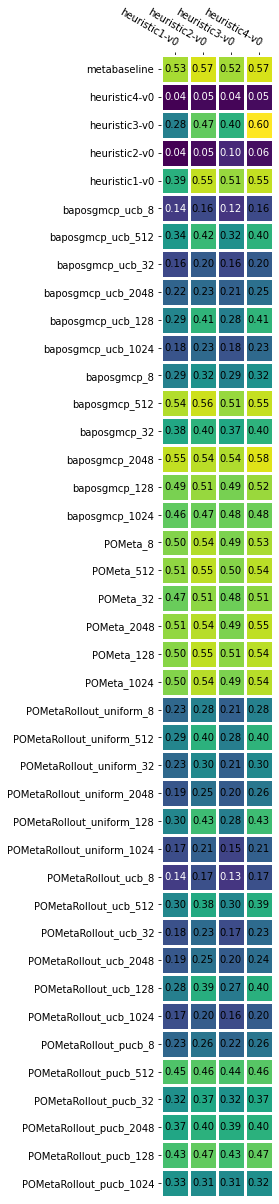

In [15]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_return_mean", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(16, 21), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

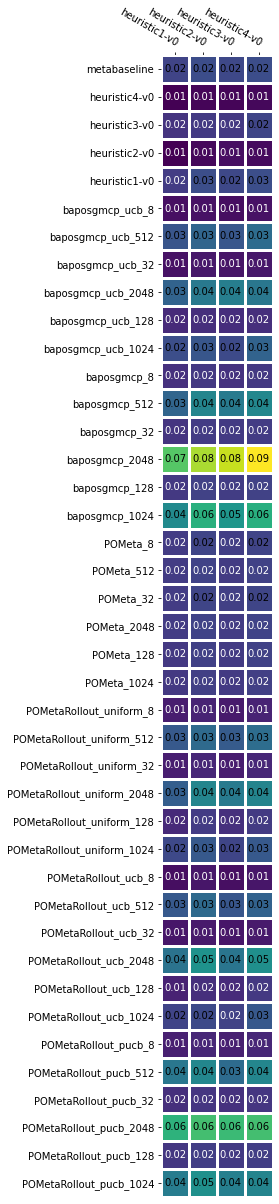

In [16]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_return_CI", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(16, 21), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

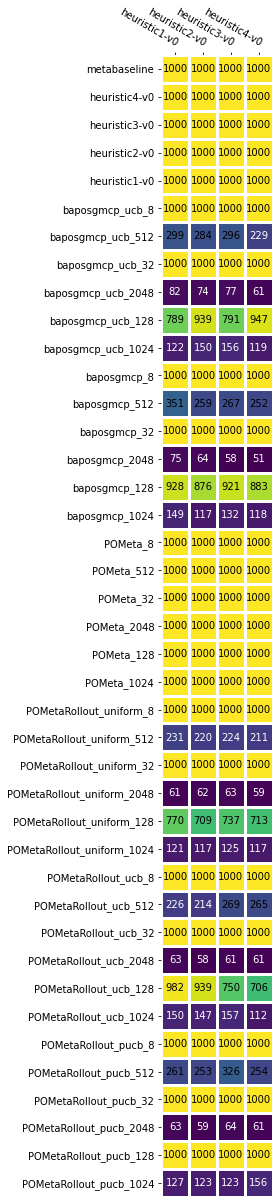

In [17]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(16, 21), 
    valfmt="{x:.0f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Prior Performance

Here we look at the expected performance against the policy prior of BAPOSGMCP.

In [22]:
policy_prior = {1: {
    "heuristic1-v0": 1/4,
    "heuristic2-v0": 1/4,
    "heuristic3-v0": 1/4,
    "heuristic4-v0": 1/4
}}

# Plot via num sims
policies_with_sims = [
    "POMetaRollout_pucb",
    "POMetaRollout_ucb",
    "POMetaRollout_uniform",
    "POMeta",
    "baposgmcp",
    "baposgmcp_ucb"
]

policies_without_sims = [
    "metabaseline"
]

In [20]:
expected_mean_returns_values, expected_mean_returns_err_values, policy_ids = plot_utils.get_expected_values_by_prior(
    combined_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_key="policy_id",
    policy_prior=policy_prior
)
for i, policy_id in enumerate(policy_ids):
    value = expected_mean_returns_values[i]
    err_value = expected_mean_returns_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")

POMetaRollout_pucb_1024 = 0.32 +/- 0.04
POMetaRollout_pucb_128 = 0.45 +/- 0.02
POMetaRollout_pucb_2048 = 0.39 +/- 0.06
POMetaRollout_pucb_32 = 0.35 +/- 0.02
POMetaRollout_pucb_512 = 0.45 +/- 0.04
POMetaRollout_pucb_8 = 0.24 +/- 0.01
POMetaRollout_ucb_1024 = 0.18 +/- 0.02
POMetaRollout_ucb_128 = 0.33 +/- 0.02
POMetaRollout_ucb_2048 = 0.22 +/- 0.04
POMetaRollout_ucb_32 = 0.20 +/- 0.01
POMetaRollout_ucb_512 = 0.34 +/- 0.03
POMetaRollout_ucb_8 = 0.15 +/- 0.01
POMetaRollout_uniform_1024 = 0.19 +/- 0.03
POMetaRollout_uniform_128 = 0.36 +/- 0.02
POMetaRollout_uniform_2048 = 0.22 +/- 0.04
POMetaRollout_uniform_32 = 0.26 +/- 0.01
POMetaRollout_uniform_512 = 0.34 +/- 0.03
POMetaRollout_uniform_8 = 0.25 +/- 0.01
POMeta_1024 = 0.52 +/- 0.02
POMeta_128 = 0.52 +/- 0.02
POMeta_2048 = 0.52 +/- 0.02
POMeta_32 = 0.49 +/- 0.02
POMeta_512 = 0.52 +/- 0.02
POMeta_8 = 0.51 +/- 0.02
baposgmcp_1024 = 0.47 +/- 0.05
baposgmcp_128 = 0.50 +/- 0.02
baposgmcp_2048 = 0.55 +/- 0.08
baposgmcp_32 = 0.39 +/- 0.02
baposgm

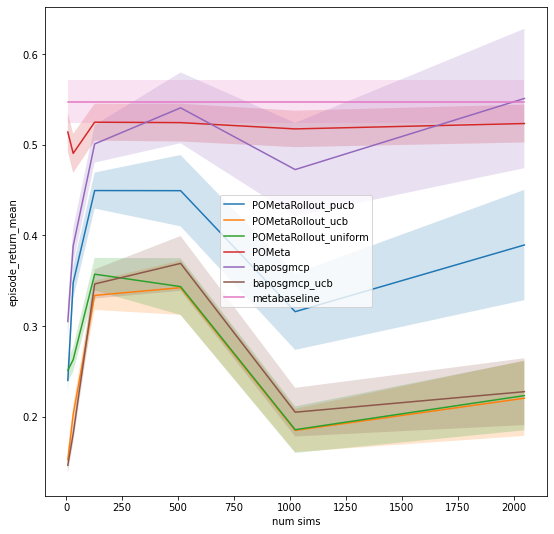

In [23]:
plot_utils.plot_expected_values_by_num_sims(
    y_key="episode_return_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=policy_ids,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)